# Code to view the DES data
January 27, 2020



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py

import subprocess as sp
import os

In [2]:
# %matplotlib widget

In [3]:
def f_plot_images(img_lst):
    ''' Plots 2D for 10 images
    input argument : idx = image number
    Gives 10 images from idx to idx+10
    '''
    
    rows,cols=2,5
    assert len(img_lst)>=10, "Array list is less than 10"
    arr=img_lst[:10]
    
    fig,axarr=plt.subplots(rows,cols,figsize=(20,8))
    for i in range(rows*cols):
        row,col=int(i/cols),i%cols
#         print(i,'\t',row,col)
#         axarr[row,col].imshow(arr[i],origin='lower',alpha=0.1)
        axarr[row,col].imshow(arr[i],origin='lower',interpolation='nearest',cmap='cool', extent = [0, 51, 0, 51])

#         axarr[row,col].set_xticks(np.arange(0,52,13))
#         axarr[row,col].set_yticks(np.arange(0,52,13))

#     fig.subplots_adjust(hspace=0.0)
    # Drop axis labels
    temp=plt.setp([a.get_xticklabels() for a in axarr[:-1,:].flatten()], visible=False)
    temp=plt.setp([a.get_yticklabels() for a in axarr[:,1:].flatten()], visible=False)

    

def f_plot_comparison(img_lst):
    '''
    Plotting srch,temp and diff .gif files together for comparison
    '''
    
    rows,cols=1,3
    arr=img_lst[:3]
    
    fig,axarr=plt.subplots(rows,cols,figsize=(20,8))
    print(axarr.shape)
    axarr=np.expand_dims(axarr,axis=0)
    for i in range(rows*cols):
        row,col=int(i/cols),i%cols
#         print(i,'\t',row,col)
#         axarr[row,col].imshow(arr[i],origin='lower',alpha=0.1)
        axarr[row,col].imshow(arr[i],origin='lower',interpolation='nearest',cmap='cool', extent = [0, 51, 0, 51])

#         axarr[row,col].set_xticks(np.arange(0,52,13))
#         axarr1[row,col].set_yticks(np.arange(0,52,13))

#     fig.subplots_adjust(hspace=0.0)
    # Drop axis labels
    temp=plt.setp([a.get_xticklabels() for a in axarr[:-1,:].flatten()], visible=False)
    temp=plt.setp([a.get_yticklabels() for a in axarr[:,1:].flatten()], visible=False)  

In [4]:
data_dir='/global/project/projectdirs/dasrepo/vpa/supernova_cnn/data/gathered_data/'

In [5]:
fname1=data_dir+'summary_label_files.csv'
df1=pd.read_csv(fname1,sep=',',comment='#')

In [6]:
num_sig,num_bkgnd=df1[df1.Label==1].shape[0],df1[df1.Label==0].shape[0]
print("Proportion of Signal-Background: {0}-{1}.\nProportion of Signal: {2}".format(num_sig,num_bkgnd,num_sig*1.0/(num_sig+num_bkgnd)))

Proportion of Signal-Background: 1334613-1362276.
Proportion of Signal: 0.49487131283489977


In [7]:
### Extracting 30 images of signal and bkgnd
df_sig=df1[df1.Label==1].head(30)
df_bkg=df1[df1.Label==0].head(30)

del(df1)

In [8]:
# df_sig

In [9]:
# df_bkg

## Plot the images

### Plot signal for certain type

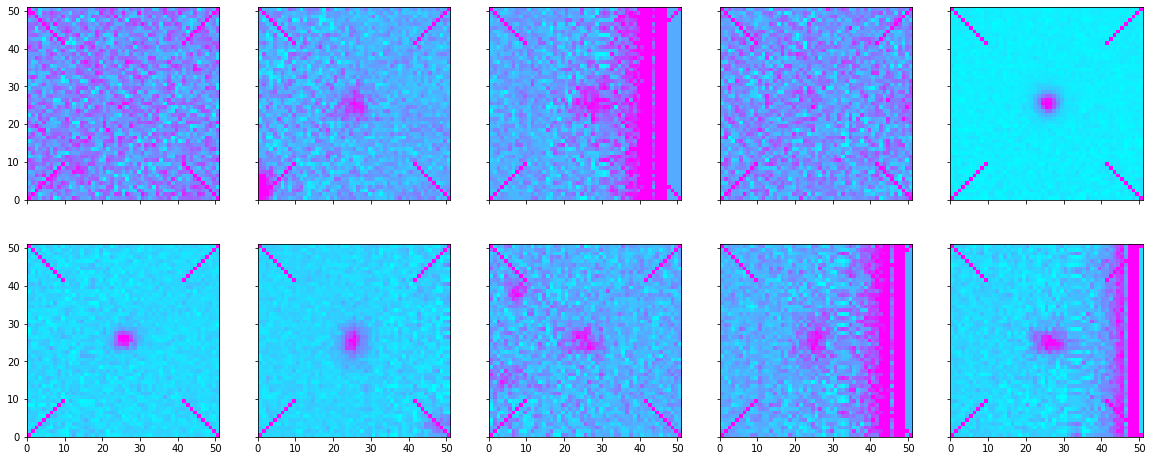

In [10]:
### Pick a certain type of image 
strgs=['temp','diff','srch']
strg='srch'
df2=df_sig[df_sig.filename.str.contains(strg)]

### Read .gif files and store them in a list
img_lst=[plt.imread(fle) for fle in df2['file path']]
f_plot_images(img_lst)

### Plot background for certain type

In [11]:
### Pick a certain type of image 
strgs=['temp','diff','srch']
strg='srch'
df2=df_bkg[df_bkg.filename.str.contains(strg)]

### Read .gif files and store them in a list
img_lst=[plt.imread(fle) for fle in df2['file path']]




### Plot all 3 types for same Index

In [12]:
img_lst[0].shape

(51, 51)

,ID,filename,file path,Label
9,798930,srch798930.gif,/global/project/projectdirs/dasrepo/vpa/supern...,1
10,798930,temp798930.gif,/global/project/projectdirs/dasrepo/vpa/supern...,1
11,798930,diff798930.gif,/global/project/projectdirs/dasrepo/vpa/supern...,1


(3,)


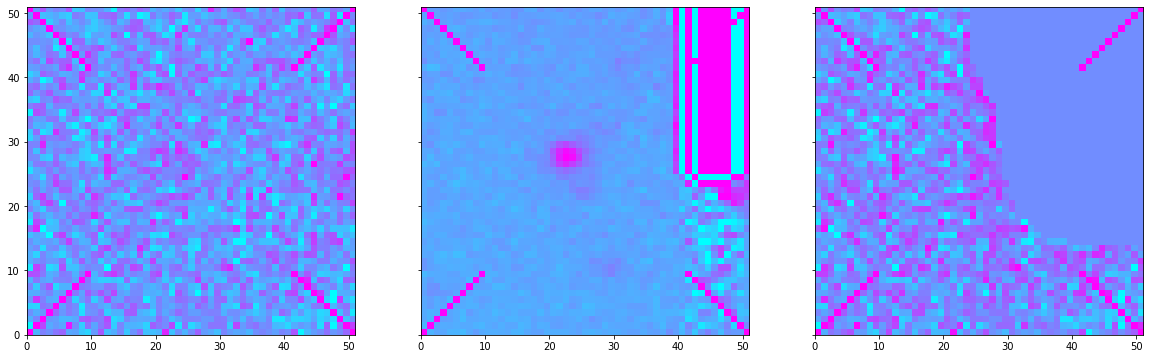

In [16]:
index=df_sig.ID.values[10]
df3=df_sig[df_sig.ID==index]
display(df3)
img_lst=[plt.imread(fle) for fle in df3['file path']]

f_plot_comparison(img_lst)

In [17]:
df3['file path'].values

array(['/global/project/projectdirs/dasrepo/vpa/supernova_cnn/data/raw_data/stamps/20141002-r1075/srch798930.gif',
       '/global/project/projectdirs/dasrepo/vpa/supernova_cnn/data/raw_data/stamps/20141002-r1075/temp798930.gif',
       '/global/project/projectdirs/dasrepo/vpa/supernova_cnn/data/raw_data/stamps/20141002-r1075/diff798930.gif'],
      dtype=object)